In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('data.csv')

In [3]:
x1 = df['X1']
x2 = df['X2']
y = df['Y']

In [4]:
def ini():
    b1 = 0
    b2 = 0
    b0 = 0.0
    return b0, b1, b2

In [5]:
def forward(x1, x2, b0, b1, b2):
    z = b0 + b1*x1 + b2*x2
    return z

In [6]:
def sigmoid(z):
    a = 1/(1+np.exp(-z))
    return a

In [7]:
def error(a, y):
    delta = a - y
    return delta

In [8]:
def update_param(b0,b1,b2,x1, x2,alpha , delta):
    b0 = b0 - alpha * np.mean(delta)
    b1 = b1 - alpha * np.mean(delta* x1) 
    b2 = b2 - alpha * np.mean(delta * x2)
    return b0, b1, b2

In [9]:
loss = []
b1_l = []
b2_l = []
def gd(x1, x2, y, alpha, epochs):
    b0, b1, b2 = ini()
    
    for j in range(epochs):
        for i in range(len(df)):
            z = forward(x1[i], x2[i], b0, b1, b2)
            a = sigmoid(z)
            delta = error(a, y[i])
            b0, b1, b2 = update_param(b0, b1, b2, x1[i], x2[i], alpha, delta)
            loss.append(delta)
            b1_l.append(b1)
            b2_l.append(b2)
        if(j%5 == 0):
            print(f"Epoch: {j+1}, b0: {b0}, b1: {b1}, b2: {b2}")
    
        
    return b0,b1,b2

In [10]:
b0, b1, b2 = gd(x1, x2, y, 0.01, 100)

Epoch: 1, b0: 0.000837238293928658, b1: 0.1164357463694871, b2: -0.016075585795773135
Epoch: 6, b0: -0.05721500330950787, b1: 0.2921617345111789, b2: -0.2253409341558444
Epoch: 11, b0: -0.11371002539956478, b1: 0.3875180062815077, b2: -0.40577499575385606
Epoch: 16, b0: -0.161375740246881, b1: 0.46799963068420275, b2: -0.5502079627481185
Epoch: 21, b0: -0.20262659493395097, b1: 0.5378022737786501, b2: -0.6704545550474642
Epoch: 26, b0: -0.23906558888279544, b1: 0.5992406057524001, b2: -0.7735691970439929
Epoch: 31, b0: -0.27174043850796503, b1: 0.6540290196259846, b2: -0.8638962482023085
Epoch: 36, b0: -0.3013788577199632, b1: 0.7034402896654227, b2: -0.9442997363301762
Epoch: 41, b0: -0.32851064243494704, b1: 0.7484286028858032, b2: -1.016771626468061
Epoch: 46, b0: -0.3535352534804521, b1: 0.789721237348154, b2: -1.0827554361020735
Epoch: 51, b0: -0.37676216815623265, b1: 0.827882551714118, b2: -1.1433316482862976
Epoch: 56, b0: -0.3984364400445079, b1: 0.863358075006136, b2: -1.1993

In [11]:
pred = [np.round(sigmoid(b0+b1*x1 + b2*x2)) for x1, x2 in zip(x1,x2)]

In [12]:
print(confusion_matrix(y, pred))

[[5 0]
 [0 5]]


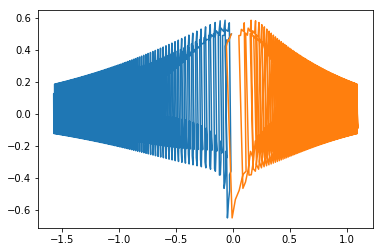

In [13]:
plt.plot(b2_l, loss)
plt.plot( b1_l, loss)
# print(b1_l)